Data Loading and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [2]:
data = load_breast_cancer()

X_full = data.data
y = data.target

# Creating and training a Naive Bayes model
gaussian_nb_1 = GaussianNB()
gaussian_nb_1.fit(X_full, y)

,priors,None
,var_smoothing,1e-09


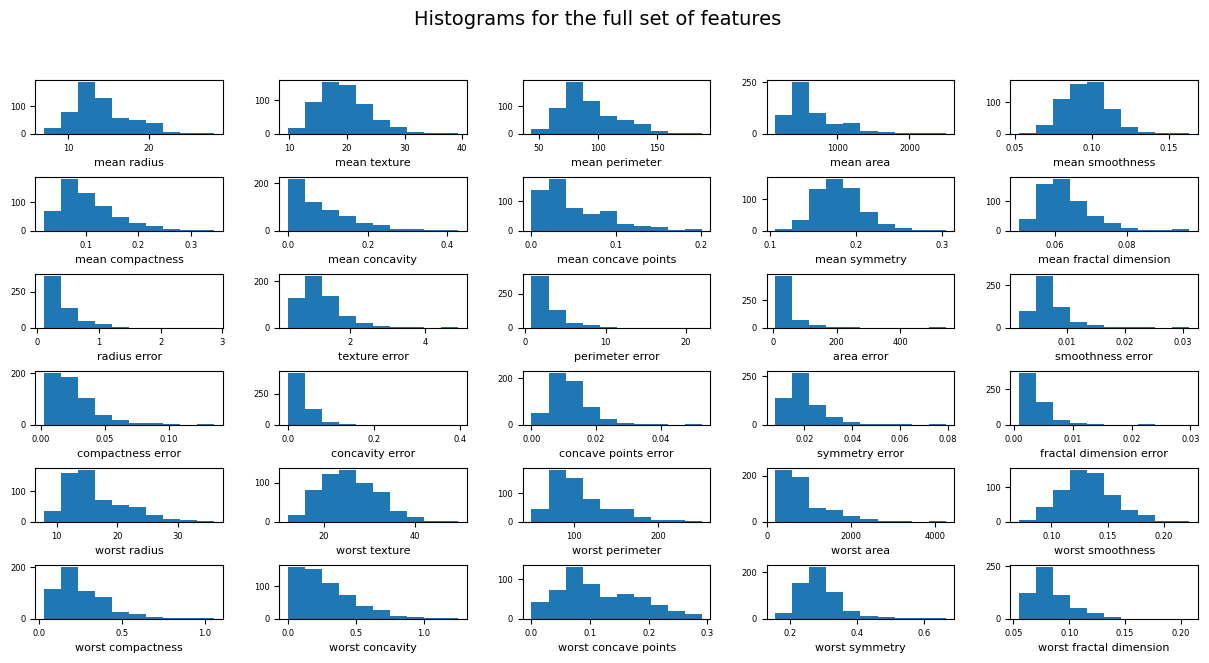

In [3]:
feature_names = data.feature_names

# Plotting histograms for all 30 features
f = plt.figure(figsize = (15, 7))

for i in range(len(feature_names)):
    plt.subplot(6, 5, i + 1)
    plt.hist(X_full[:, i])
    plt.xlabel(feature_names[i], fontsize = 8)
    plt.xticks(fontsize = 6)
    plt.yticks(fontsize = 6)

f.subplots_adjust(hspace = 0.8, wspace = 0.3)
plt.suptitle('Histograms for the full set of features', fontsize = 14)
plt.show()

In [4]:
# Prediction and model evaluation
y_pred_1 = gaussian_nb_1.predict(X_full)
print('confusion_matrix:')
print(confusion_matrix(y, y_pred_1))
print('Accuracy =', accuracy_score(y, y_pred_1))
print('F1_score =', f1_score(y, y_pred_1))

confusion_matrix:
[[189  23]
 [ 10 347]]
Accuracy = 0.9420035149384886
F1_score = 0.9546079779917469


Reduced Feature Set Experiment
Second Model Training and Evaluation (Overfitted)

In [5]:

df = pd.DataFrame(data.data, columns = data.feature_names)

# Define the list of columns to delete
columns_to_drop = [
    'mean concavity', 'radius error',
    'perimeter error', 'area error',
    'compactness error', 'concavity error',
    'fractal dimension error', 'worst area',
    'worst concavity'
]

df_reduced = df.drop(columns_to_drop, axis = 1)

# Getting data and feature names
X_reduced = df_reduced.values
reduced_feature_names = df_reduced.columns.tolist()

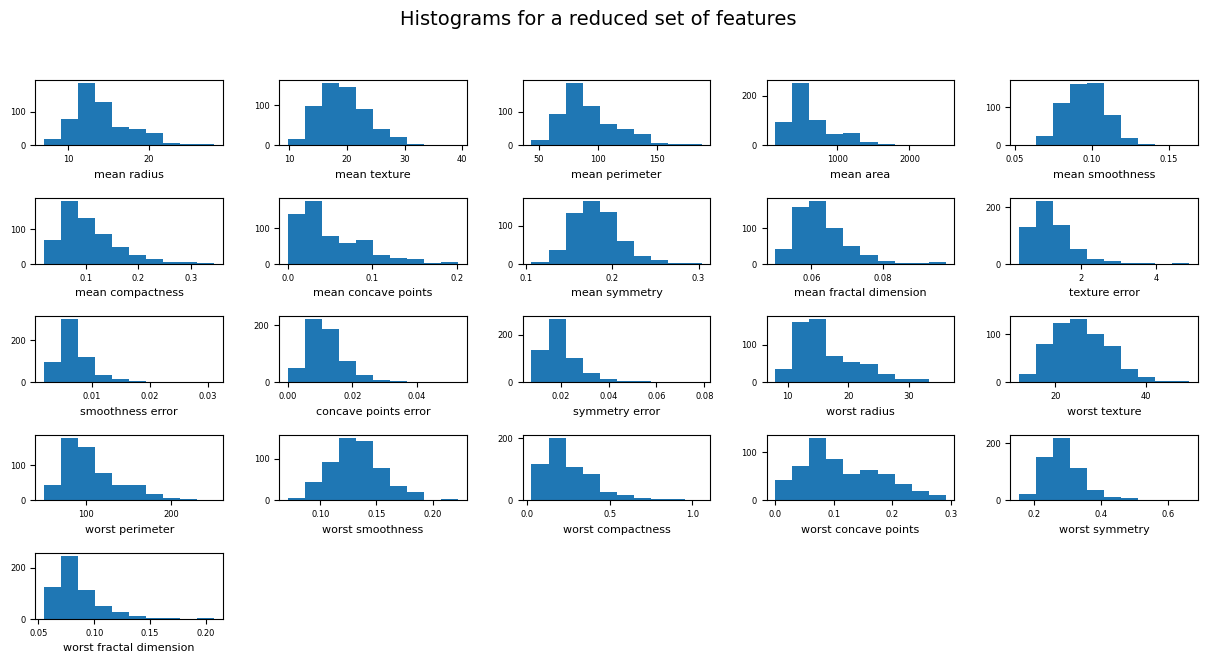

In [6]:
# Plotting histograms for the remaining 21 features
f = plt.figure(figsize = (15, 7))

for i in range(len(reduced_feature_names)):
    plt.subplot(5, 5, i + 1)
    plt.hist(X_reduced[:, i])
    plt.xlabel(reduced_feature_names[i], fontsize=8)
    plt.xticks(fontsize = 6)
    plt.yticks(fontsize = 6)

f.subplots_adjust(hspace = 0.8, wspace = 0.3)
plt.suptitle('Histograms for a reduced set of features', fontsize = 14)
plt.show()

In [7]:
print("Data form after removing columns:")
print(X_reduced.shape, y.shape)
print("Remaining signs:")
print(df.columns.tolist())
gaussian_nb_2 = GaussianNB()
gaussian_nb_2.fit(X_reduced, y)
y_pred_2 = gaussian_nb_2.predict(X_reduced)
print('confusion_matrix:')
print(confusion_matrix(y, y_pred_2))
print('Accuracy =', accuracy_score(y, y_pred_2))
print('F1_score =', f1_score(y, y_pred_2))

Data form after removing columns:
(569, 21) (569,)
Remaining signs:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
confusion_matrix:
[[196  16]
 [ 15 342]]
Accuracy = 0.945518453427065
F1_score = 0.9566433566433566


In [8]:
df2 = pd.read_csv('data.csv')
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df2['diagnosis'] = df2['diagnosis'].map({'B' : 0, 'M' : 1})
df2 = df2.drop(['id', 'Unnamed: 32'], axis = 1)
y2 = df2['diagnosis']
X2 = df2.drop('diagnosis', axis = 1)


feature_names = X2.columns
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

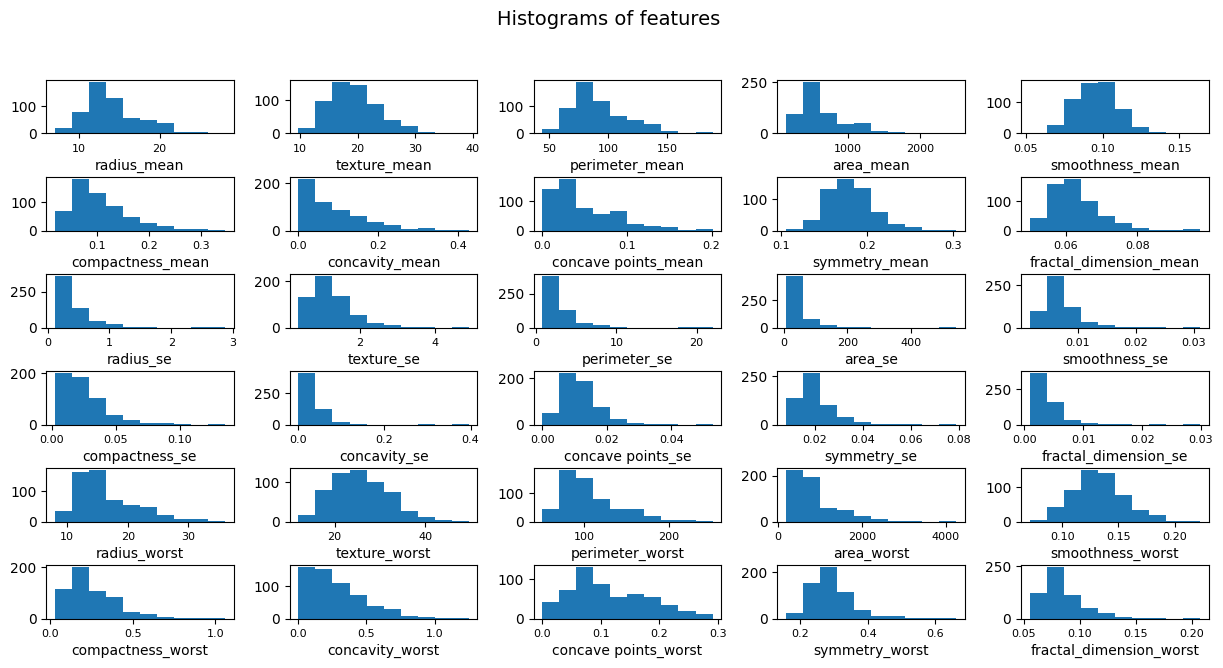

In [10]:
f = plt.figure(figsize = (15, 7))

for i in range(len(feature_names)):
    plt.subplot(6, 5, i + 1)
    plt.hist(X2.iloc[:, i])
    plt.xlabel(feature_names[i])
    plt.xticks(fontsize = 8)

f.subplots_adjust(hspace = 0.8, wspace = 0.3)

plt.suptitle('Histograms of features', fontsize = 14)
plt.show()

In [11]:
model_1 = GaussianNB()
model_1.fit(X_train_1 , y_train_1)

,priors,None
,var_smoothing,1e-09


In [12]:
y_pred_3 = model_1.predict(X_test_1)
print('confusion_matrix:')
print(confusion_matrix(y_test_1, y_pred_3))
print('f1 = ', f1_score(y_test_1, y_pred_3))
print('accuracy = ', accuracy_score(y_test_1, y_pred_3))
print('recall = ', recall_score(y_test_1, y_pred_3))

confusion_matrix:
[[71  0]
 [ 3 40]]
f1 =  0.963855421686747
accuracy =  0.9736842105263158
recall =  0.9302325581395349


Reduced Feature Set Experiment

In [13]:
columns = ['concavity_mean',
           'concave points_mean',
           'radius_se',
           'perimeter_se',
           'area_se',
           'compactness_se',
           'concavity_se',
           'fractal_dimension_se',
           'area_worst'
]
X_new = X2.drop(columns, axis = 1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()
model_2.fit(X_train_2 , y_train_2)

,priors,None
,var_smoothing,1e-09


In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
y_pred_4 = model_2.predict(X_test_2)
print('confusion_matrix = ')
print(confusion_matrix(y_test_2, y_pred_4))
print('f1 = ', f1_score(y_test_2, y_pred_4))
print('accuracy = ', accuracy_score(y_test_2, y_pred_4))
print('recall = ', recall_score(y_test_2, y_pred_4))

confusion_matrix = 
[[40  3]
 [ 2 69]]
f1 =  0.965034965034965
accuracy =  0.956140350877193
recall =  0.971830985915493
